In [1]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("hr_raw_data_nonulls.csv") 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,51,No,Unknown,684.0,Research & Development,6,High School,"162,0",Very Low,Male,51.0,Medium,Director,Research Director,Medium,Unknown,19537.000000,6462,7,No,13,"3,0",Medium,Zero,32.587161,5,"3,0",20,15,15,Yes
1,52,No,Unknown,699.0,Research & Development,1,Bachelor's,"259,0",Medium,Male,65.0,Low,Director,Manager,Medium,Unknown,19999.000000,5678,0,No,14,"3,0",Very Low,Low,34.000000,5,"3,0",33,11,9,Yes
2,42,No,Travel Rarely,532.0,Research & Development,4,Secondary,"319,0",Medium,Male,58.0,Medium,Director,Manager,High,Married,19232.000000,4933,1,No,11,"3,0",High,Zero,22.000000,3,"3,0",22,11,15,Yes
3,47,No,Travel Rarely,359.0,Research & Development,2,Bachelor's,Unknown,Very Low,Female,82.0,Medium,Manager,Research Director,Medium,Married,17169.000000,26703,3,No,19,"3,0",Low,Medium,28.789780,2,"3,0",20,5,6,No
4,46,No,Unknown,1319.0,Research & Development,3,High School,Unknown,Very Low,Female,45.0,High,Manager,Sales Executive,Very Low,Divorced,6399.663531,7739,2,No,12,"3,0",High,Low,11.520610,5,"3,0",19,2,8,No


Distribución de la Rotación de Empleados (Attrition)

Objetivo: Entender cuántos empleados han dejado la empresa versus cuántos se han quedado.

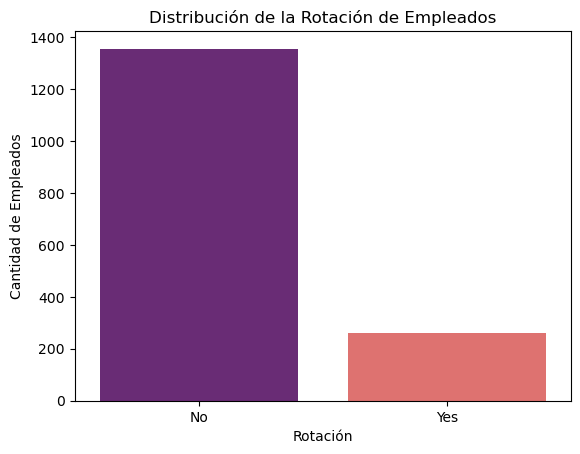

In [3]:
# Gráfico de barras para la rotación
sns.countplot(data=df, x='Attrition', palette="magma")
plt.title('Distribución de la Rotación de Empleados')
plt.xlabel('Rotación')
plt.ylabel('Cantidad de Empleados')
plt.show()

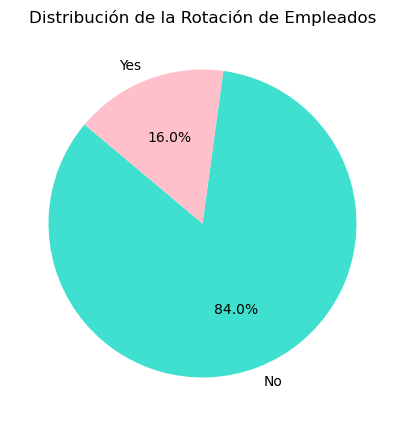

In [4]:
attrition_counts = df['Attrition'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(5,5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=["turquoise", "pink"])

# Añadir título
plt.title('Distribución de la Rotación de Empleados')

# Mostrar el gráfico
plt.show()

Relación entre Satisfacción y Rotación

Objetivo: Ver si existe una relación entre la satisfacción laboral y la rotación.

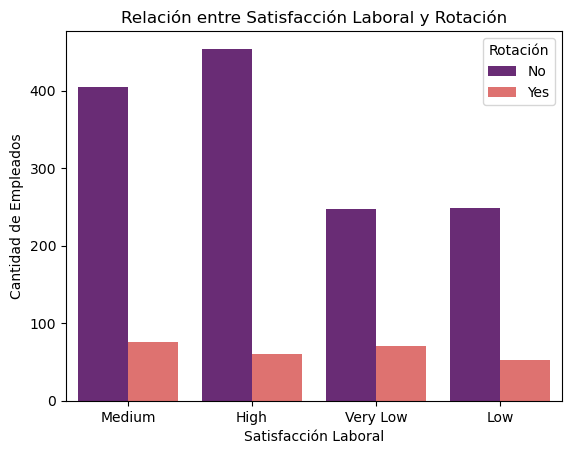

In [5]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='magma')

# Añadir título y etiquetas
plt.title('Relación entre Satisfacción Laboral y Rotación')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Cantidad de Empleados')
plt.legend(title="Rotación")
# Mostrar el gráfico
plt.show()

Relación entre Rotación y Trabajo Remoto

Descripción: Este gráfico de barras apiladas muestra cómo la rotación se distribuye entre empleados que trabajan de forma remota y los que no.

Objetivo: Evaluar el impacto del trabajo remoto en la retención de empleados.

Interpretación: Muestra si hay una diferencia significativa en la rotación entre empleados que trabajan de forma remota y los que no.

Conclusión: Los empleados que tienen la opción de trabajar de forma remota tienen una menor tasa de rotación. Esto sugiere que ofrecer flexibilidad laboral podría ayudar a retener empleados.

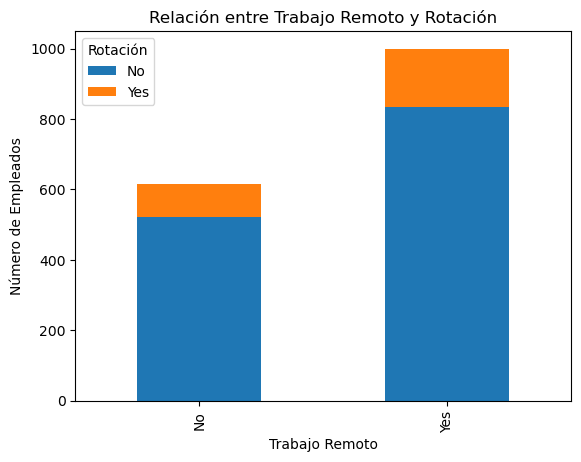

In [12]:
# Gráfico de barras apiladas para atrición y trabajo remoto
datos_agrupados = df.groupby(['RemoteWork', 'Attrition']).size().unstack(fill_value=0)
datos_agrupados.plot(kind='bar', stacked=True)
plt.title('Relación entre Trabajo Remoto y Rotación')
plt.xlabel('Trabajo Remoto')
plt.ylabel('Número de Empleados')
plt.legend(title='Rotación')
plt.show()

Ingreso Mensual y Rotación

Objetivo: Ver si el ingreso mensual tiene una correlación con la rotación.


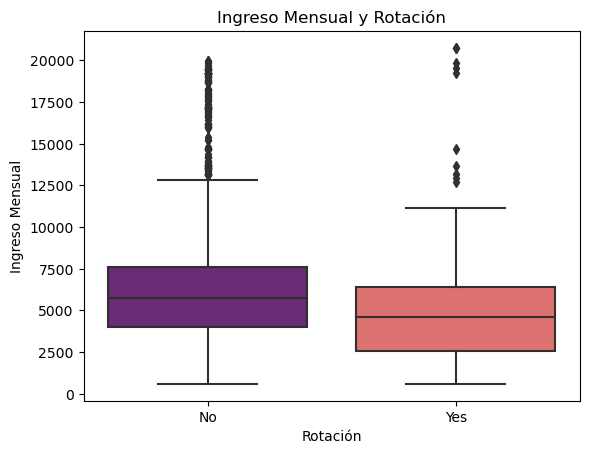

In [13]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='magma')
plt.title('Ingreso Mensual y Rotación')
plt.xlabel('Rotación')
plt.ylabel('Ingreso Mensual')
plt.show()

Análisis de la Rotación por Género y Estado Civil

Descripción: Este gráfico muestra la rotación de empleados desglosada por género y estado civil, lo que puede ayudar a identificar tendencias específicas en estos grupos.

Interpretación: Examina si hay diferencias en la rotación entre diferentes combinaciones de género y estado civil.

Objetivo: Identificar si ciertos grupos demográficos son más propensos a dejar la empresa.

Conclusión: Se observa una mayor tasa de rotación entre empleados solteros, lo cual podría estar relacionado con una falta de beneficios o apoyo que podrían estar recibiendo los empleados casados.

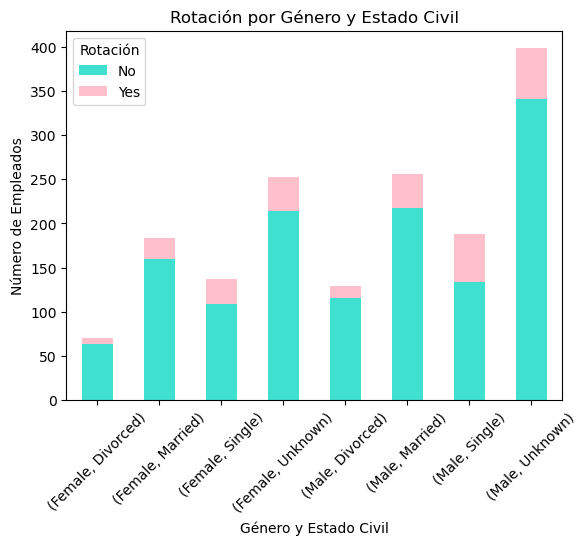

In [27]:
# Gráfico de barras apiladas para atrición por género y estado civil
datos_agrupados = df.groupby(['Gender', 'MaritalStatus', 'Attrition']).size().unstack(fill_value=0)
datos_agrupados.plot(kind='bar', stacked=True, color=["turquoise", "pink"])
plt.title('Rotación por Género y Estado Civil')
plt.xlabel('Género y Estado Civil')
plt.ylabel('Número de Empleados')
plt.legend(title='Rotación')
plt.xticks(rotation=45)
plt.show()

Relación entre Género y Rotación

Descripción: Este gráfico de barras muestra la proporción de empleados que han dejado la empresa frente a los que se han quedado, desglosado por género. Las barras están divididas en secciones que representan empleados que permanecieron en la empresa y los que la dejaron.

Objetivo: Identificar si hay diferencias significativas en las tasas de rotación entre hombres y mujeres.

Interpretación:
Muestra si hay una disparidad en las tasas de rotación entre géneros. Si una sección de la barra (que representa la rotación) es notablemente más grande para un género en particular, esto podría indicar que dicho grupo es más propenso a abandonar la empresa.

Conclusión:
El gráfico muestra que la tasa de rotación es similar entre hombres y mujeres. Esto indica que no hay una disparidad significativa en la retención de empleados basada en el género. La empresa parece mantener una política de retención equitativa para ambos géneros

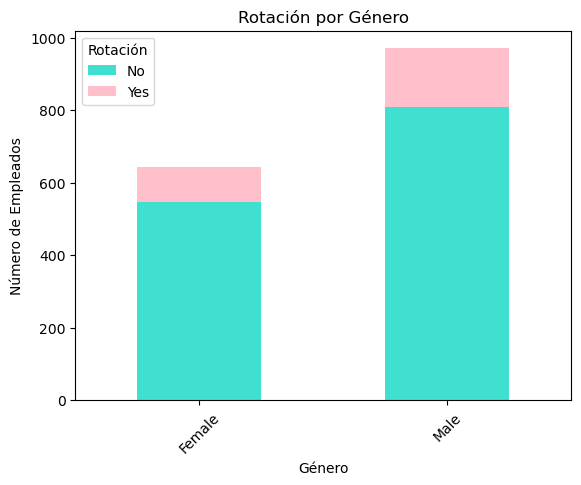

In [26]:
# Gráfico de barras apiladas para rotación por género
datos_rotacion = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
datos_rotacion.plot(kind='bar', stacked=True, color=["turquoise", "pink"])
plt.title('Rotación por Género')
plt.xlabel('Género')
plt.ylabel('Número de Empleados')
plt.legend(title='Rotación')
plt.xticks(rotation=45)
plt.show()

Rotación por Departamento

Objetivo: Identificar qué departamentos tienen mayores tasas de rotación.


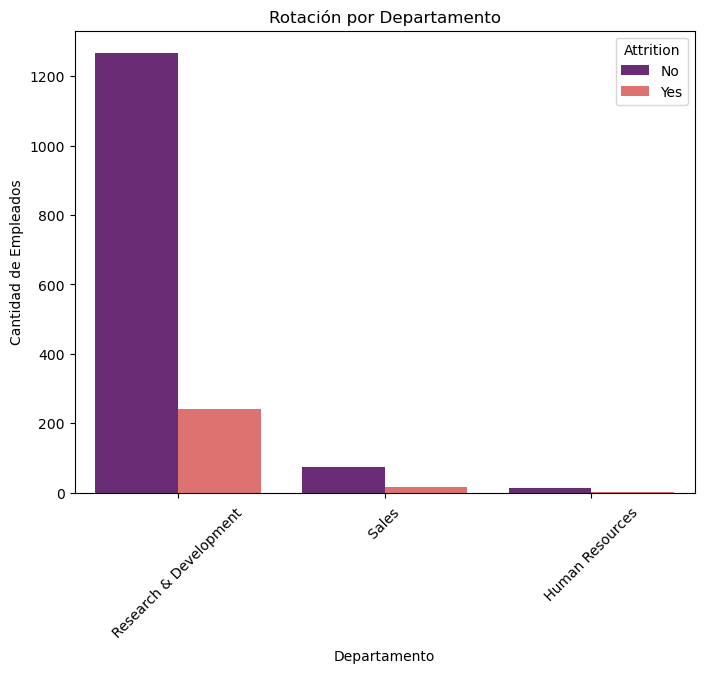

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='magma')
plt.title('Rotación por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)
plt.show()

Rotación por Horas Extras (OverTime)

Objetivo: Analizar si el trabajo extra está relacionado con la rotación de empleados.


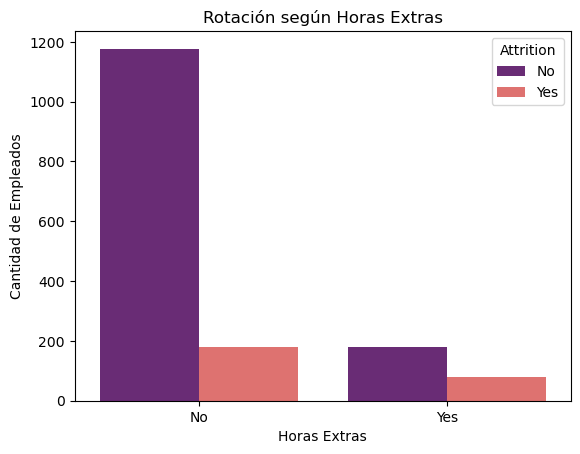

In [20]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='magma')
plt.title('Rotación según Horas Extras')
plt.xlabel('Horas Extras')
plt.ylabel('Cantidad de Empleados')
plt.show()

Gráfico de Barras Apiladas: Rotación por Satisfacción Laboral y Horas Extras

Este gráfico apilado muestra la relación entre la satisfacción laboral, el trabajo de horas extras, y la rotación.

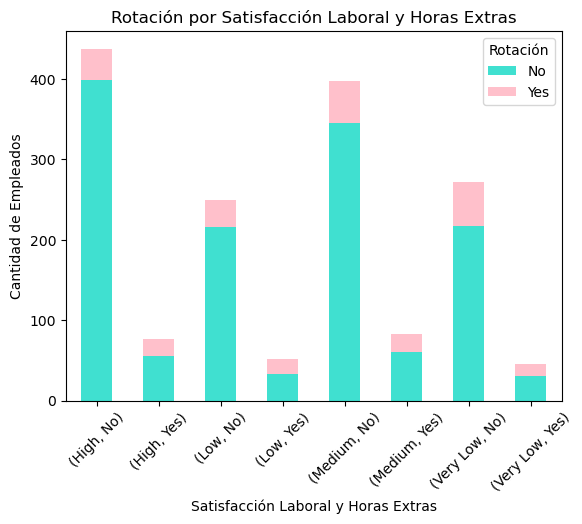

In [25]:
cross_tab = pd.crosstab([df['JobSatisfaction'], df['OverTime']], df['Attrition'])

# Gráfico de barras apiladas
cross_tab.plot(kind='bar', stacked=True, color=["turquoise", "pink"])

plt.title('Rotación por Satisfacción Laboral y Horas Extras')
plt.xlabel('Satisfacción Laboral y Horas Extras')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)
plt.legend(title="Rotación")
plt.show()

Rotación y Distancia desde el Hogar (DistanceFromHome)

Objetivo: Analizar si la distancia desde el hogar influye en la rotación.


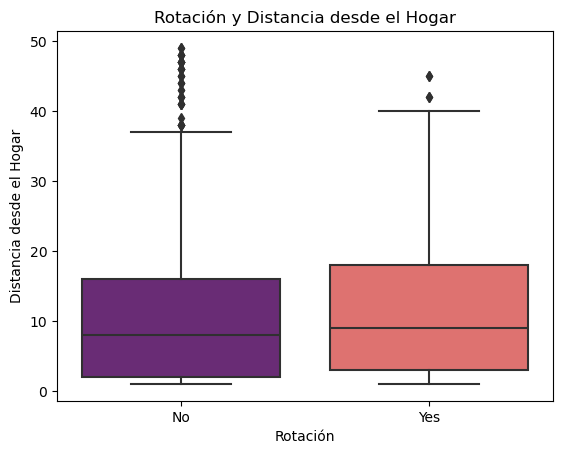

In [30]:
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='magma')
plt.title('Rotación y Distancia desde el Hogar')
plt.xlabel('Rotación')
plt.ylabel('Distancia desde el Hogar')
plt.show()